In [1]:
import pandas as pd
from SQL import create_db_connection, execute_query
import matplotlib.pyplot as plt
import h5py
import datetime
import numpy as np

In [2]:
#user_info
pw = "p0larizati0n"
user = "root"
db = "IRCSP"

In [3]:
#connect to IRCSP database
connection = create_db_connection("localhost", user, pw, db)

MySQL Database connection successful


In [139]:
df = pd.read_fwf("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/flight.rpt")
df[100:102]

,TIME,BAR ALT,MBS,AIRT,DRAD,LAT,LON,GPS ALT
100,17:08:34,96320.0,12.80,-30.5,24.1,34-26.9,-104-17.9,29112.0
101,17:09:34,96856.0,12.49,-26.6,26.5,34-26.8,-104-18.5,29268.0


In [60]:
df_ircsp = pd.read_csv("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/telemetry.csv")
df_time = pd.read_csv("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/tele_time.csv",header = None)
df_ircsp

,time,acceleration,t_sbc,t_ircsp,humidity,pressure,voltage,cam1_t,cam2_t
0,1627078722,0.975586,1,22.31,20.99,876.19,4.65298,26.9,26.8
1,1627078735,0.967285,1,22.33,20.93,876.16,4.68231,26.9,26.8
2,1627078748,0.969727,1,22.31,20.90,876.16,4.70186,26.9,26.8
3,1627078763,0.973633,1,22.29,20.85,876.18,4.71163,26.9,26.8
4,1627078781,0.970703,1,22.27,20.82,876.22,4.70674,30.3,30.2
...,...,...,...,...,...,...,...,...,...
2086,1627092532,0.960938,1,39.22,11.11,8.67,5.00000,55.8,56.9
2087,1627092544,0.951172,1,39.25,11.08,8.63,5.00000,55.8,56.9
2088,1627092556,0.961914,1,39.26,11.06,8.63,5.00000,55.9,56.9
2089,1627092568,0.958008,1,39.28,11.03,8.66,5.00000,55.9,56.9


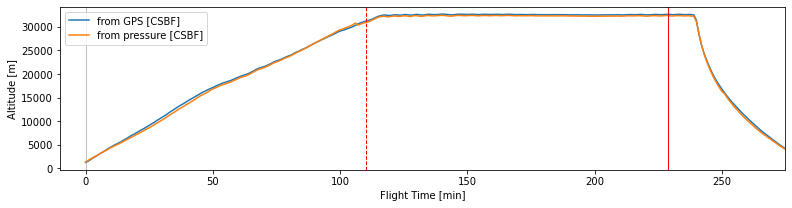

In [136]:
fig, ax = plt.subplots(figsize=(13, 3))
plt.plot(df['GPS ALT'],label = "from GPS [CSBF]")
plt.plot(df['BAR ALT']/ 3.281,label = "from pressure [CSBF]" )
plt.ylabel('Altitude [m]')
plt.xlabel('Flight Time [min]')
ax.axvline(0,color='gray', linewidth=0.5)#,label = "Launch")
ax.axvline(110,linestyle = '--',color='red', linewidth=1)#,label = "Est. Heatsink Loss")
ax.axvline(229,color='red', linewidth=1)#,label = "IRCSP Shutdown")
plt.legend()
plt.xlim([-10,275])
plt.show()

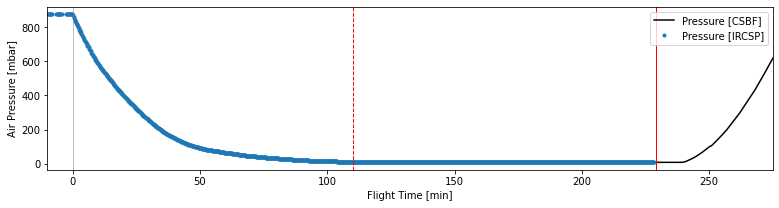

In [137]:
start = 850;
offset = 284;

fig, ax = plt.subplots(figsize=(13, 3))
plt.plot(df['MBS'],'k',label = "Pressure [CSBF]")
plt.plot(df_time[0][start:]-offset,df_ircsp['pressure'][start:],'.',label = "Pressure [IRCSP]")
plt.ylabel('Air Pressure [mbar]')
plt.xlabel('Flight Time [min]')
ax.axvline(0,color='gray', linewidth=0.5)#,label = "Launch")
ax.axvline(110,linestyle = '--',color='red', linewidth=1)#,label = "Est. Heatsink Loss")
ax.axvline(229,color='red', linewidth=1)#,label = "IRCSP Shutdown")
plt.legend()
plt.xlim([-10,275])
plt.show()

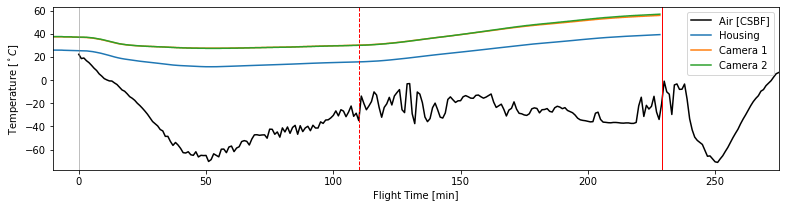

In [138]:
fig, ax = plt.subplots(figsize=(13, 3))
plt.plot(df['AIRT'],'k',label = "Air [CSBF]")
plt.plot(df_time[0][start:]-offset,df_ircsp['t_ircsp'][start:],label = "Housing")
plt.plot(df_time[0][start:]-offset,df_ircsp['cam1_t'][start:],label = "Camera 1")
plt.plot(df_time[0][start:]-offset,df_ircsp['cam2_t'][start:],label = "Camera 2")
plt.ylabel('Temperature [$^\circ C$]')
plt.xlabel('Flight Time [min]')
ax.axvline(0,color='gray', linewidth=0.5)#,label = "Launch")
ax.axvline(110,linestyle = '--',color='red', linewidth=1)#,label = "Est. Heatsink Loss")
ax.axvline(229,color='red', linewidth=1)#,label = "IRCSP Shutdown")
plt.legend()
plt.xlim([-10,275])
plt.show()